In [11]:
import pymc3 as pm
import pandas as pd
import matplotlib as m

In [4]:
# %load http://bit.ly/drug_trial_data


drug = pd.DataFrame(dict(iq=(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101),
                         group='drug'))
placebo = pd.DataFrame(dict(iq=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99),
                            group='placebo'))

trial_data = pd.concat([drug, placebo], ignore_index=True)


group
drug       [[AxesSubplot(0.125,0.125;0.775x0.755)]]
placebo    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

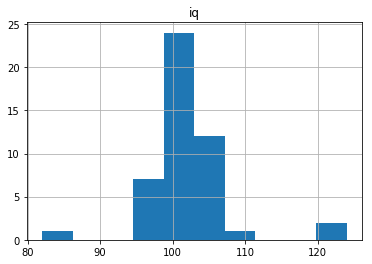

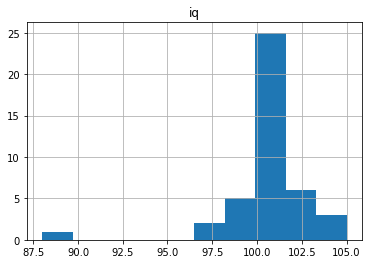

In [10]:
trial_data.groupby('group').hist()

In [12]:
iq = trial_data.iq.values

In [17]:
treat = trial_data.group.replace({'drug':1,'placebo':0}).values
treat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [30]:
with pm.Model() as drug_model:
    ν = pm.HalfNormal('ν' , sd=10)
    μ = pm.Normal('μ' , 100,sd=100, shape=2)
    σ = pm.HalfCauchy('σ',3, shape =2)
    diff = pm.Deterministic('diff', μ[1] - μ[0])
    obs = pm.StudentT('obs',ν,mu=μ[treat], sd=σ[treat], observed = iq)

In [31]:
with drug_model:
    trace = pm.sample(1000,tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ, ν]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:06<00:00, 929.41draws/s] 


In [32]:
pm.summary(trace).round(3)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
μ__0,100.518,0.215,0.005,100.125,100.940,2092.669,1.000
μ__1,101.536,0.373,0.008,100.832,102.241,2173.038,1.000
ν,1.789,0.462,0.011,0.987,2.714,1392.790,1.000
σ__0,1.034,0.206,0.004,0.665,1.443,2098.035,1.000
σ__1,1.996,0.410,0.011,1.247,2.848,1367.276,1.001
diff,1.019,0.431,0.009,0.174,1.841,2309.833,1.000


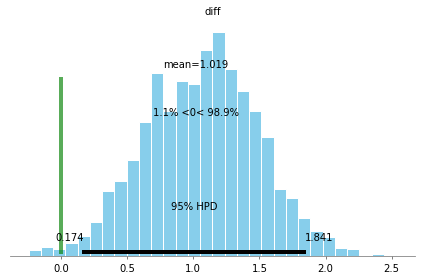

In [33]:
pm.plot_posterior(trace, varnames=['diff'],ref_val=0)